<a href="https://colab.research.google.com/github/zzaeyun/ESAA22-2/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_409to451.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 ch7. 1-5 pg.409-451

## **07 군집화**

### **01 K-평균 알고리즘 이해**
**K-평균**
- 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘
- 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포이트를 선택, 이런 방법을 반복


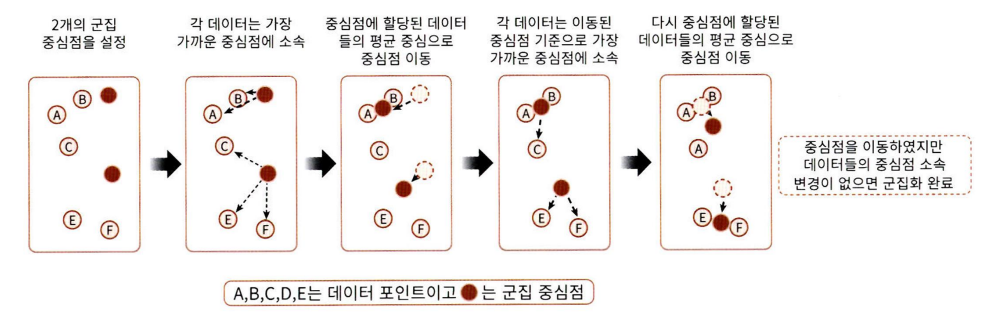

K-평균의 장점
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이 쉽고 간결

K-평균의 단점
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 (이를 위해 PCA로 차원 감소를 적용해야할 수 있음)
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집을 선택해야 할지 가이드하기가 어려움

**사이킷런 KMeans 클래스 소개**


In [ ]:
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                             precompute_distances='auto', verbose=0, random_state=None,
                             copy_x=True, n_jobs=1, algorithm='auto')

**주요 파라미터**
- KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_clusters, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미
- init는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++방식으로 최초 설정
- max_iter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

KMeans는 사이킷런의 비지도학습 클래스와 마찬가지로 fit(데이터 세트) 또는 fit_transform(데이터 세트) 메서드를 이용해 수행

**주요 속성**
- labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_: 각 군집 중심점 좌표. 이를 이용하면 군집 중심점 좌표가 어딘지 시각화 가능


**K-평균을 이용한 붓꽃 데이터 세트 군집화**

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
#붓꽃 데이터 세트를 3개 그룹으로 군집화

kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
#kmeans의 labels_ 속성값을 확인
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


효과적으로 군집화가 되었는지 확인

붓꽃 데이터 세트의  target 값을 'target' 칼럼으로, 앞에서 구한 labels_ 값을 'cluster' 칼럼으로 지정해 irisDF DataFrame에 추가한 뒤에 group by 연산을 실제 분류값인 target과 군집화 분류값인 cluster 레벨로 적용해 target과 cluster 값 개수를 비교


In [5]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


 - 타깃이 0값인 데이터는 1번 군집으로 잘 그루핑
 - 1값인 데이터는 2개만 2번 군집 나머지는 0번 군집
 - 2값인 데이터는 14개가 0번 군집 36개는 2번 군집  

In [6]:
#붓꽃 데이터 세트 군집화
 
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

#4개의 속성을 2개로 차원 축소
irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


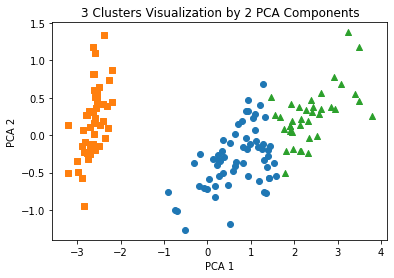

In [7]:
#군집 값에 따라 별도의 인덱스로 추출

marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

Cluster 1을 나타내는 네모는 명확히 다른 군집과 잘 분리, 하지만 Cluster 0와 2는 명확하게 분리되진 않음

### **군집화 알고리즘 테스트를 위한 데이터 생성**

사이킷런에선 다양한 유형 군집화 알고리즘을 테스트하기 위한 간단한 데이터 생성기 제공
- make_blobs()
- make_classification()

하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터 생성


---
make_blobs( )는 피처 데이터 세트와 타깃 데이터 세트가 튜플로 반환

make_blobs( )의 호출 파라미터
- n_samples: 생성할 총 데이터 개수. 디폴트는 100개
- n_features: 데이터의 피처 개수
- centers: int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냄
- cluster_std: 생성될 군집 데이터의 표준 편차. 만일 float 값 0.8 과 같은 형태로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어지고, [0.8, 1.2, 0.6]으로 입력하면 n번재 군집 내 데이터의 표준편차로 설정



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts=np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [10]:
import pandas as pd

clusterDF=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


make_blob( )으로 만든 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인

타깃값에 따라 마커를 다르게 해서 산점도를 그려보기

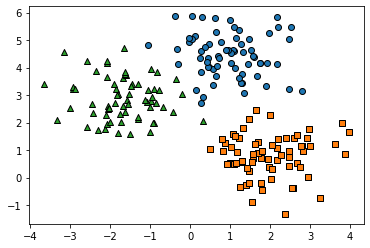

In [13]:
target_list=np.unique(y)

markers=['o','s','^','P','D','H','x']

for target in target_list:
  target_cluster=clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

plt.show()

KMeans 군집화를 수행한 뒤에 군집별로 시각화

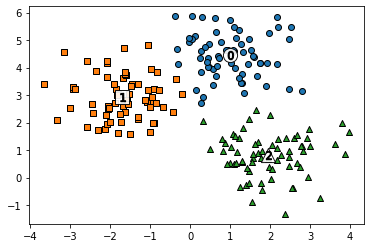

In [16]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['kmeans_label']==label]
  center_x_y=centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  plt.scatter(x=center_x_y[0],y=center_x_y[1], s=200, color='white', 
              alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1], s=70, color='k', 
               edgecolor='k', marker='$%d$' % label)

In [17]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


### **02 군집 평가(Cluster Evaluation)**

- 대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블을 가지고 있지 않으며, 분류와 성격이 많이 다름
- 군집화가 효율적으로 잘 됐는지 평가할 수 있는 방법으로 실루엣 분석 사용

**실루엣 분석의 개요**

실루엣 분석 (silhouette analysis)
- 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
- 효율적으로 잘 분리 됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
- 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유 공간을 가지고 떨어져 있을 것

실루엣 분석은 실루엣 계수를 기반으로 함
- 실루엣 계수는 개별 데이터가 가지는 군집화 지표
- 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리되어있는지를 나타내는 지표


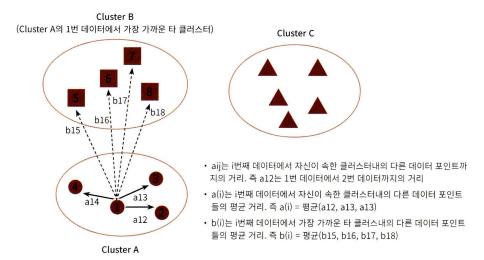

실루엣 계수
- a(i): 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
- b(i): 해당 데이터가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리

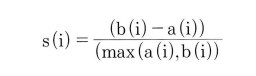

실루엣 계수는 -1 에서 1사이의 값
- 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것
- 0에 가까울수록 근처의 군집과 가까워진다는 것
- -값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻함

사이킷런 제공 메서드
- sklearn.metrics.silhouette_samples(X, labels, metric='duclidean', **kwds) : 각 데이터 포인트의 실루엣 계수를 계산해 반환
- sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds): 실루엣 계수 값을 평균하여 반환, 일반적으로 이 값이 높을수록 군집화가 어느정도 잘 됐다고 판단할 수 있음, 하지만 무조건 이 값이 높다고 해서 군집화가 잘 됐다고 판단할 수 없음

**좋은 군집화의 조건**

1. 전체 실루엣 꼐수의 평균값, 즉 사이킷런의 silhouette_score( )값은 0~1 사이의 값을 가짐, 1에 가까울수록 좋음
2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함, 특정 군집의 실루엣 계수의 평균값만 유난히 높고 다른 군집의 실루엣 계수 평균값이 낮으면 좋은 군집화 조건이 아님



**붓꽃 데이터 세트를 이용한 군집 평가**

붓꽃 데이터 세트의 군집화 결과를 실루엣 분석으로 평가

In [18]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris=load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

score_samples=silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape', score_samples.shape)

irisDF['silhouette_coeff']=score_samples

average_score=silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [19]:
#군집별로 평균 실루엣 계수
#group by

irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

**군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

- 전체 데이터의 평균 실루엣 계수가 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없음
- 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 잇는 경우에 K-평균 의 적절한 군집 개수가 설정됐다고 판단할 수 있음

여러 개의 군집 개수가 주어졌을 때 이를 분석한 도표를 참고해 평균 실루엣 계수로 군집 개수를 최적화하는 방법
- 군집을 2~4개로 분리했을 때 위치를 보고 판단 
- 아래와 같은 경우가 적절한 군집화

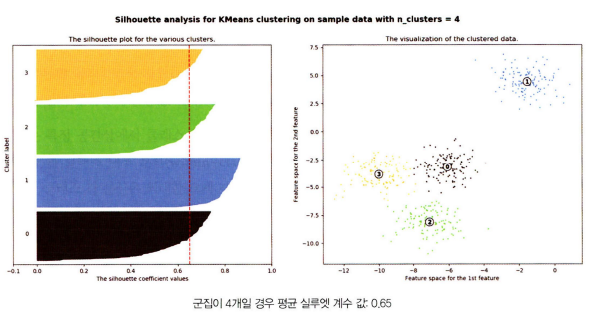

군집이 2~5개일 때의 군집별 평균 실루엣 계수 값 구하는 방법

In [22]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


def visualize_silhouette(cluster_lists, X_features):     
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
visualize_silhouette([2, 3, 4, 5], X_features)

make_blobs( )함수를 통해 4개 군집 중심의 500개 2차원 데이터 세트를 만들고 이를 K-평균을 군집화할 때, 최적의 군집 개수를 시각화로 알아보기

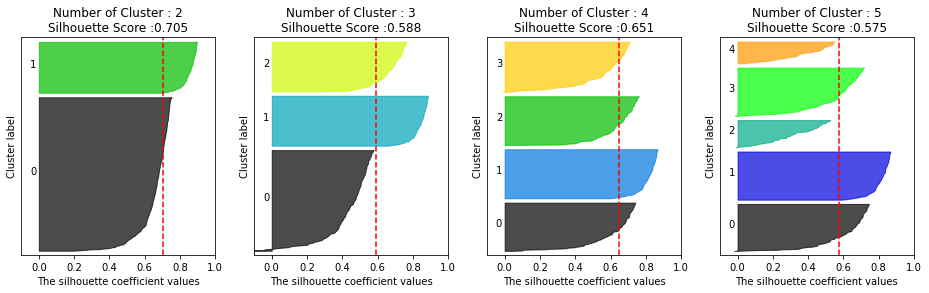

In [24]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
               center_box=(-10.0, 10.0), shuffle=True, random_state=1)

visualize_silhouette([2,3,4,5],X)

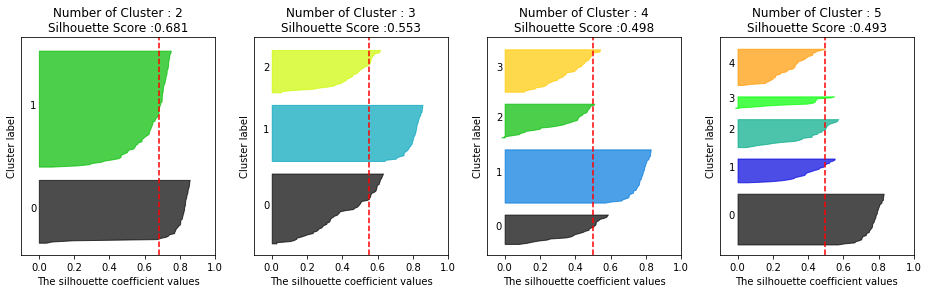

In [25]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5], iris.data)

### **03 평균 이동**

**평균 이동(Mean Shift)의 개요**

평균 이동
- K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행
- 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동
- 데이터의 분포도를 이용해 군집 중심점을 찾음
- 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안
- 확률 밀도 함수를 이용
- 확률 밀도 함수가 피크인 점이 가장 집중적으로 데이터가 모여있기 대문에 군집 중심점으로 선정
- 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE를 이용


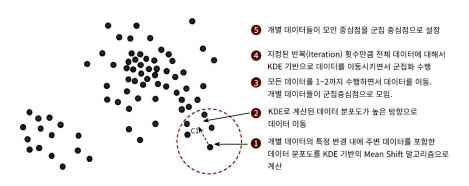

KDE (Kernel Density Estimation)
- 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
- 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정

**KDE 커널 함수식 표현**
- K: 커널 함수
- x: 확률 변숫값
- xi: 관측값
- h: 대역폭

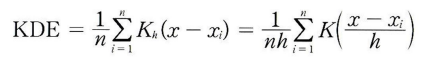

대역폭 h는 KDE 형태를 부드러운 또는 뾰족한 형태로 평활화 하는 데 적용
- 작은 h 값은 좁고 뾰족한 KDE: 과적합 하기 쉬움
- 큰 h 값은 과도하게 평활화된 KDE로 인해 과소적합 하기 쉬움

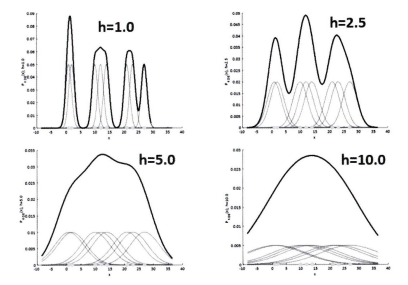

In [26]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift 

X,y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))
#bandwidth 값을 작게 할수록 군집 개수가 많아짐

cluster labels 유형: [0 1 2 3 4 5]


In [27]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [28]:
#bandwidth를 최적화 값으로 설정하는 것이 매우 중요
#estimate_bandwidth( ) 함수를 이용하면 최적화된 bandwidth 값을 반환

from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [29]:
import pandas as pd

clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
best_bandwidth=estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('Cluster labels 유형:', np.unique(cluster_labels))

Cluster labels 유형: [0 1 2]


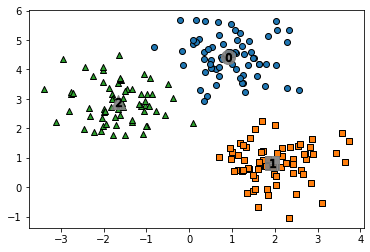

In [32]:
#3개의 군집으로 시각화

import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['meanshift_label']==label]
  center_x_y=centers[label]

  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', marker='$%d$' % label)

plt.show()

In [33]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


평균 이동 군집화 기법은 분석 업무 기반의 데이터 세트보다는 컴퓨터 비전 영역에서 더욱 많이 활용

이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역할 수행


---

###**GMM(Gaussian Mixture Model)**

**GMM 소개**

GMM
- 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(GaussianDistribution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화 수행
- 정규분포로도 알려진 가우시안 분포는 좌우 대칭형의 종 형태
- 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성되어 있으며, 이를 추출하여 개별 데이터가 이 중 어떤 정규 분포에 속하는 결정하는 방식

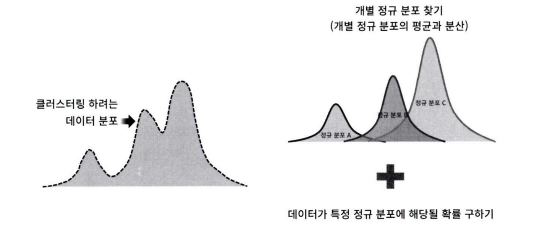


**GMM을 이용한 붓꽃 데이터 세트 군집화**

In [34]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [35]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result=irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


**GMM과 K-평균 비교**

- 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아짐

아래는 cluster_std를 작게 설정하면 원형 형태로 분산되며, KMeans로 효과적인 군집화된 것을 확인 할 수 있음

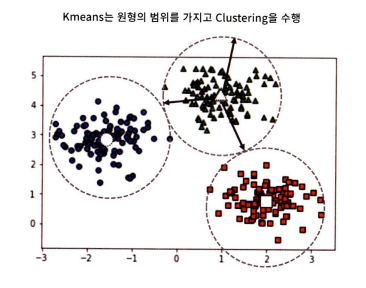

군집 시각화 함수 생성

**visualize_cluster_plot( )**
- clusterobj: 사이킷런의 군집 수행 객체
- dataframe: 피처 데이터 세트와 label 값을 가진 DataFrame
- label_name: 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼 명, make_blobs( ) 결과 시각화일 경우는 dataframe 내의 target 칼럼 명
- iscenter: 사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True 아니면 False

In [36]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

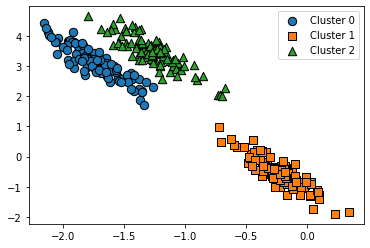

In [37]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

transformation=[[0.060834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso=np.dot(X, transformation)

clusterDF=pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

위처럼 타원형으로 바꾼 데이터 세트는 KMeans 군집화 정확성이 떨어짐

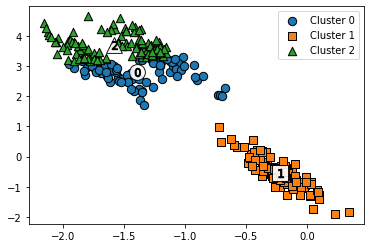

In [38]:
#kmenas 적용
kmeans=KMeans(3, random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

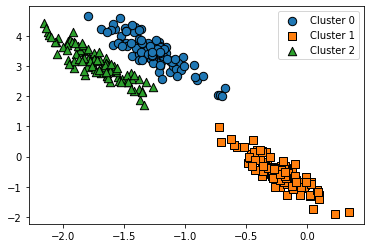

In [39]:
#GMM 적용

gmm=GaussianMixture(n_components=3, random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

GMM은 군집의 중심 좌표를 구할 수 없으므로 시각화 불가

make_blobs의 target 값과 군집 label 값을 비교하여 효율 차이 확인

In [40]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       0                55
        2                45
1       1               100
2       2                66
        0                34
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


### **05 DBSCAN**

**DBSCAN 개요**

DBSCAN(Density Based Spatial Clustering of Applications with Noise): 밀도 기반 군집화
- 간단하고 직관적인 알고리즘임에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화 가능
- 아래와 같은 내부의 원 모양과 외부의 원 모양 형태의 분포를 가진 데이터 세트를 군집화 할 때에도 잘 수행

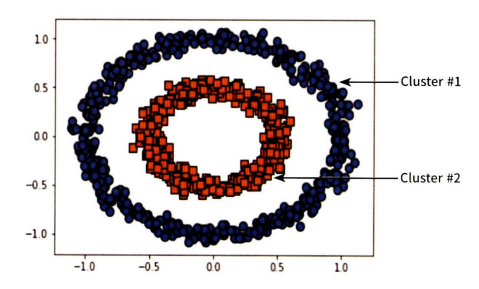

**DBSCAN의 중요한 두 가지 파라미터**
- 입실론 주변 영역 (epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수 (min poinits): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터 개수

**데이터 포인트 정의**
- 핵심 포인트 (Core Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트
- 이웃 포인트 (Neighbor Point): 주변 영역 내에 위치한 타 데이터를 이웃 포인트
- 경계 포인트 (Border Point): 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있진 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
- 잡음 포인트 (Noise Point): 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터 

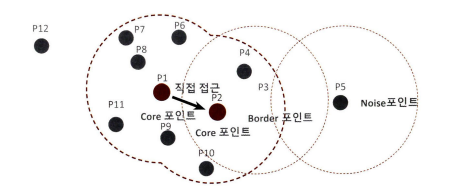

사이킷런은 DBSCAN 클래스를 통해 DBSCAN 알고리즘 지원

주요 초기화 파라미터
- eps: 입실론 주변 영역의 반경 의미
- min_samples: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미

---



**DBSCAN 적용하기 - 붓꽃 데이터 세트**


In [41]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


- 군집 레이블이 -1 인 것은 노이즈에 속하는 군집을 의미
- target 값의 유형이 3가지이지만 2개의 군집으로 군집화 했다고 군집화 효율이 떨어진다는 것을 의미하는 것은 아님
- DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정

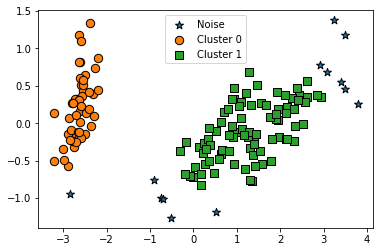

In [42]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2, random_state=0)
pca_transformed=pca.fit_transform(iris.data)

irisDF['ftr1']=pca_transformed[:,0]
irisDF['ftr2']=pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 별표는 노이즈
- 이처럼 PCA로 2차원으로 표현하면 이상치인 노이즈 데이터가 명확히 드러남
- DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋음
- eps의 값을 크게하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 줄어들게 됨


eps를 0.8로 증가시켜 적용

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


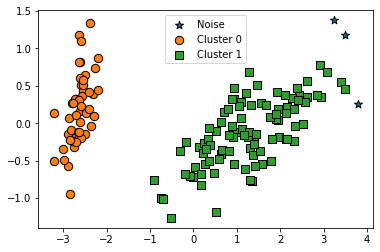

In [44]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


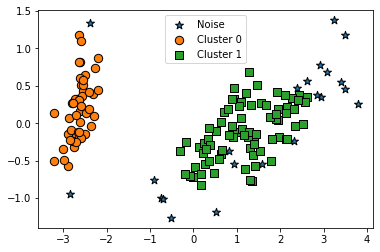

In [46]:
#하이퍼미터 변경: 노이즈값 증가

dbscan=DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

**DBSCAN 적용하기 - make_circles()데이터 세트**

복잡한 기하학적 분포를 가지는 데이터 세트에서 DBSCAN과 타 알고리즘 비교

make_circles( ) 함수를 이용해 내부 원과 외부 원 형태로 되어 있는 2차우너 데이터 세트를 만들어 적용

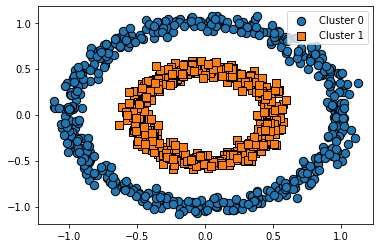

In [47]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

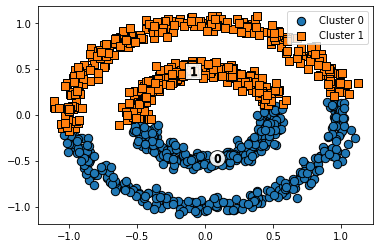

In [49]:
#KMeans로 군집화 수행
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

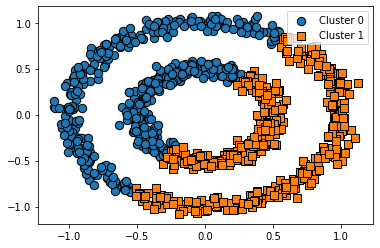

In [50]:
#GMM으로 군집화 수행
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=2, random_state=0)
gmm_label=gmm.fit(X).predict(X)
clusterDF['gmm_cluster']=gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

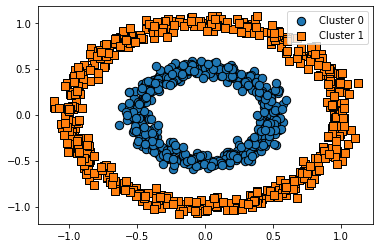

In [51]:
#DBSCAN으로 군집화 수행
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels=dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)